In [24]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from pandas.api.types import CategoricalDtype
from scipy.stats import expon

In [25]:
# preprocessed dataset

# url = 'https://raw.githubusercontent.com/brivadeneira/diplo-notes/main/salary_vs_programming_languages/preprocessed_salaries_dataset.csv'
# df = pd.read_csv(url)


df = pd.read_csv('preprocessed_salaries_dataset.csv')
df.head()

,work_province,work_dedication,profile_experience_range,monthly_gross_salary,salary_comparison_last_semester,list_of_tools_platform,list_of_tools_programming_languages,list_of_tools_frameworks,list_of_tools_data_bases,list_of_tools_qa_testing,usd_monthly_gross_salary,mean_salary_in_top_tech,ratio_top_tech
0,Chaco,part-time,0-1,55000.0,2,NaN,['sql'],NaN,"['mysql', 'postgresql']","['lippia', 'postman']",209.675575,NaN,NaN
1,Chaco,part-time,1-2,50000.0,1,['google'],"['css', 'html', 'java', 'python', 'sql']","['django', 'spring']","['microsoft azure (tables', 'cosmosdb', 'sql',...",['postman'],190.614159,NaN,NaN
2,Ciudad Autónoma de Buenos Aires,part-time,0-1,55000.0,4,"['docker', 'firebase', 'google cloud platform'...","['javascript', 'python']","['node.js', 'react.js']","['mariadb', 'microsoft sql server', 'mongodb',...",NaN,209.675575,NaN,NaN
3,Ciudad Autónoma de Buenos Aires,part-time,1-2,222000.0,3,"['docker', 'linux']","['javascript', 'python', 'sql']","['django', 'vue.js']","['mariadb', 'postgresql']",['postman'],846.326865,NaN,NaN
4,Ciudad Autónoma de Buenos Aires,part-time,3-5,120000.0,1,['windows server'],"['css', 'python']","['django', 'vue.js']","['mysql', 'sqlite']","['visual studio coded ui', 'xunit']",457.473981,NaN,NaN


In [26]:
df.columns

Index(['work_province', 'work_dedication', 'profile_experience_range',
       'monthly_gross_salary', 'salary_comparison_last_semester',
       'list_of_tools_platform', 'list_of_tools_programming_languages',
       'list_of_tools_frameworks', 'list_of_tools_data_bases',
       'list_of_tools_qa_testing', 'usd_monthly_gross_salary',
       'mean_salary_in_top_tech', 'ratio_top_tech'],
      dtype='object')

### Columnas y su clasificación

- categóricas no ordenadas:
    - `work_province`: 24 diferentes strings, 23 por provincia más
    - `profile_years_experience`: '0-1', '1-2', '3-5', '6-10', '10+'
    - `list_of_tools_platform`: lista de str con las tools según su clasificación
    - `list_of_tools_programming_languages`: idem tools_platform.
    - `list_of_tools_frameworks`: idem tools_platform.
    - `list_of_tools_data_bases`: idem tools_platform.
    - `list_of_tools_qa_testing`: idem tools_platform.
- categóricas ordenadas:
    - `work_dedication`: 'part-time' o 'full-time'
    - `salary_comparison_last_semester`: [1, 2, 3, 4]
- cuantitativas:
    - `monthly_gross_salary`: en ARS
    - `usd_monthly_gross_salary`: `monthly_gross_salary` en USD según la conversión detallada en el pre-processing.
    - `mean_salary_in_top_tech`: promedio de salario según la lista de lenguajes de programación, extraído del top 10 *ver pre-processing*
    - `ratio_top_tech`: relación de cociente entre `usd_monthly_gross_salary` y el salario más alto entre la lista de lenguajes de programación, extraído del top 10 *ver pre-processing*

In [27]:
def human_format(num, pos=1):
    """
    human formatting for big numbers
    """
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return "%.0f%s" % (num, ["", "K", "M", "G", "T", "P"][magnitude])


FORMATTER = FuncFormatter(human_format)

In [28]:
FIGSIZE, VSUBPLOTS_FIGSIZE, HSUBPLOTS_FIGSIZE, DPI = (12, 5), (15, 5), (15, 4), 100
PASTEL_PALETTE = sns.color_palette('pastel')
MAIN_PALETTE = itertools.cycle(PASTEL_PALETTE)
CATEGORICAL_PALETTE = sns.color_palette('Set2')
SECUENTIAL_PALETTE = sns.color_palette('flare')

statistics_of_interest = ['mean', 'std', '25%', '50%', '75%']

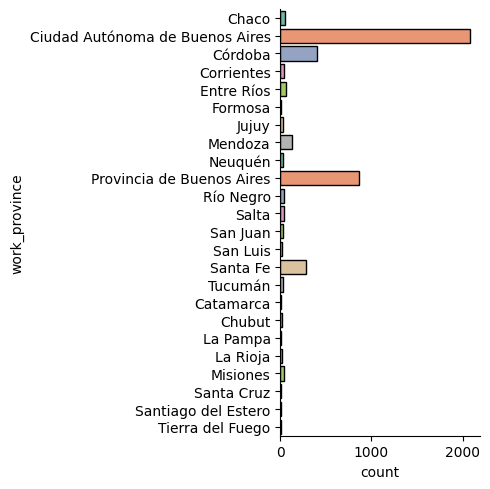

In [32]:
sns.catplot(data=df,
            y='work_province',
            kind='count',
            palette=CATEGORICAL_PALETTE,
            edgecolor='black')

Se observa, a priori, una distribución desproporcionada por lugar de residencia, *sin mencionar que Ciudad de Buenos Aires no es una provincia*

> "Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa"

Si bien el análisis está enfocado en el sueldo de las personas encuestadas *según el lenguaje de programación*, pero complementado por el resto del stack tecnológico, los años de experiencia y la posible inferencia del costo de vida en el lugar de residencia, y puede resultar algo forzado elegir y analizar pares de variables sólo por su categoría, se visualizan y analizan conjuntamente como sigue: